In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorboard as tb

sns.set_theme(style="darkgrid")

In [2]:
id_dict = {
    'No actions': 'UJocbPTnTBudls2BF97OKQ',
    'Full state': 'dJ9B5l9mSVK8I6arzvTnfQ',
    'Repeat actions': 'mxv6xTegRjmAAb1c2YH6tA',
    'No shaping': '3nEAsO4lTnWgi4Nqge70jA'
}

In [3]:
if not os.path.exists('No actions.csv'):
    for name, experiment_id in id_dict.items():
        experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
        df = experiment.get_scalars()
        reward_df = df[df.tag == 'train/mean_episode_reward'] \
            .sort_values('step', axis=0).fillna(value=0)[['step', 'value']].reset_index()
        step_df = df[df.tag == 'train/mean_episode_steps'] \
            .sort_values('step', axis=0).fillna(value=0)[['step', 'value']].reset_index()
        combined_df = pd.DataFrame(data={'step': reward_df.step,
                                         'reward': reward_df.value,
                                         'episode_step': step_df.value},
                                   index=None)
        combined_df.to_csv(f'{name}.csv', index=False)

In [4]:
# read df to dict
df_dict = {}
for name in id_dict.keys():
    df = pd.read_csv(f'{name}.csv')
    df = df.assign(experiment=name)
    df_dict[name] = df

In [5]:
# do all df have the same length?
len(set(map(lambda df: len(df), df_dict.values()))) == 1

True

In [6]:
# combine all of them into 1 df
data = pd.concat(df_dict.values(), ignore_index=True)

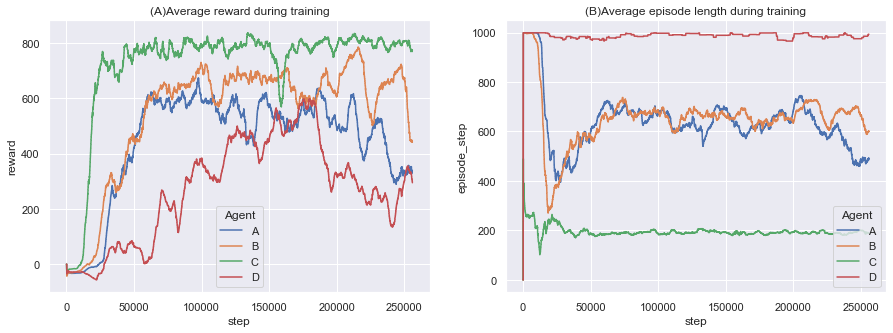

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].set_title('(A)Average reward during training')
axes[1].set_title('(B)Average episode length during training')


sns.lineplot(data=data, x='step', y='reward', hue='experiment', ax=axes[0], ci=None, legend=False)
sns.lineplot(data=data, x='step', y='episode_step', hue='experiment', ax=axes[1], ci=None, legend=False)

axes[0].legend(labels=['A', 'B', 'C', 'D'], loc='lower center', title='Agent')
axes[1].legend(labels=['A', 'B', 'C', 'D'], loc='lower right', title='Agent')
plt.savefig('C:\\Users\\Hasegawa\\Desktop\\AIT Note\\Thesis\\proposal draft\\figures\\training_result4.png', dpi=150)